In [1]:
!pip install pytesseract
!pip install tesseract
!pip install tesseract-ocr
!pip install pillow

In [78]:
from pytesseract import pytesseract
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.util import invert
from skimage.io import imread
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
from scipy.ndimage import interpolation as inter
import scipy
from skimage.filters import threshold_mean


In [59]:
# path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# pytesseract.tesseract_cmd = path_to_tesseract

In [60]:
path_to_images = r'../Task3_images/car/'

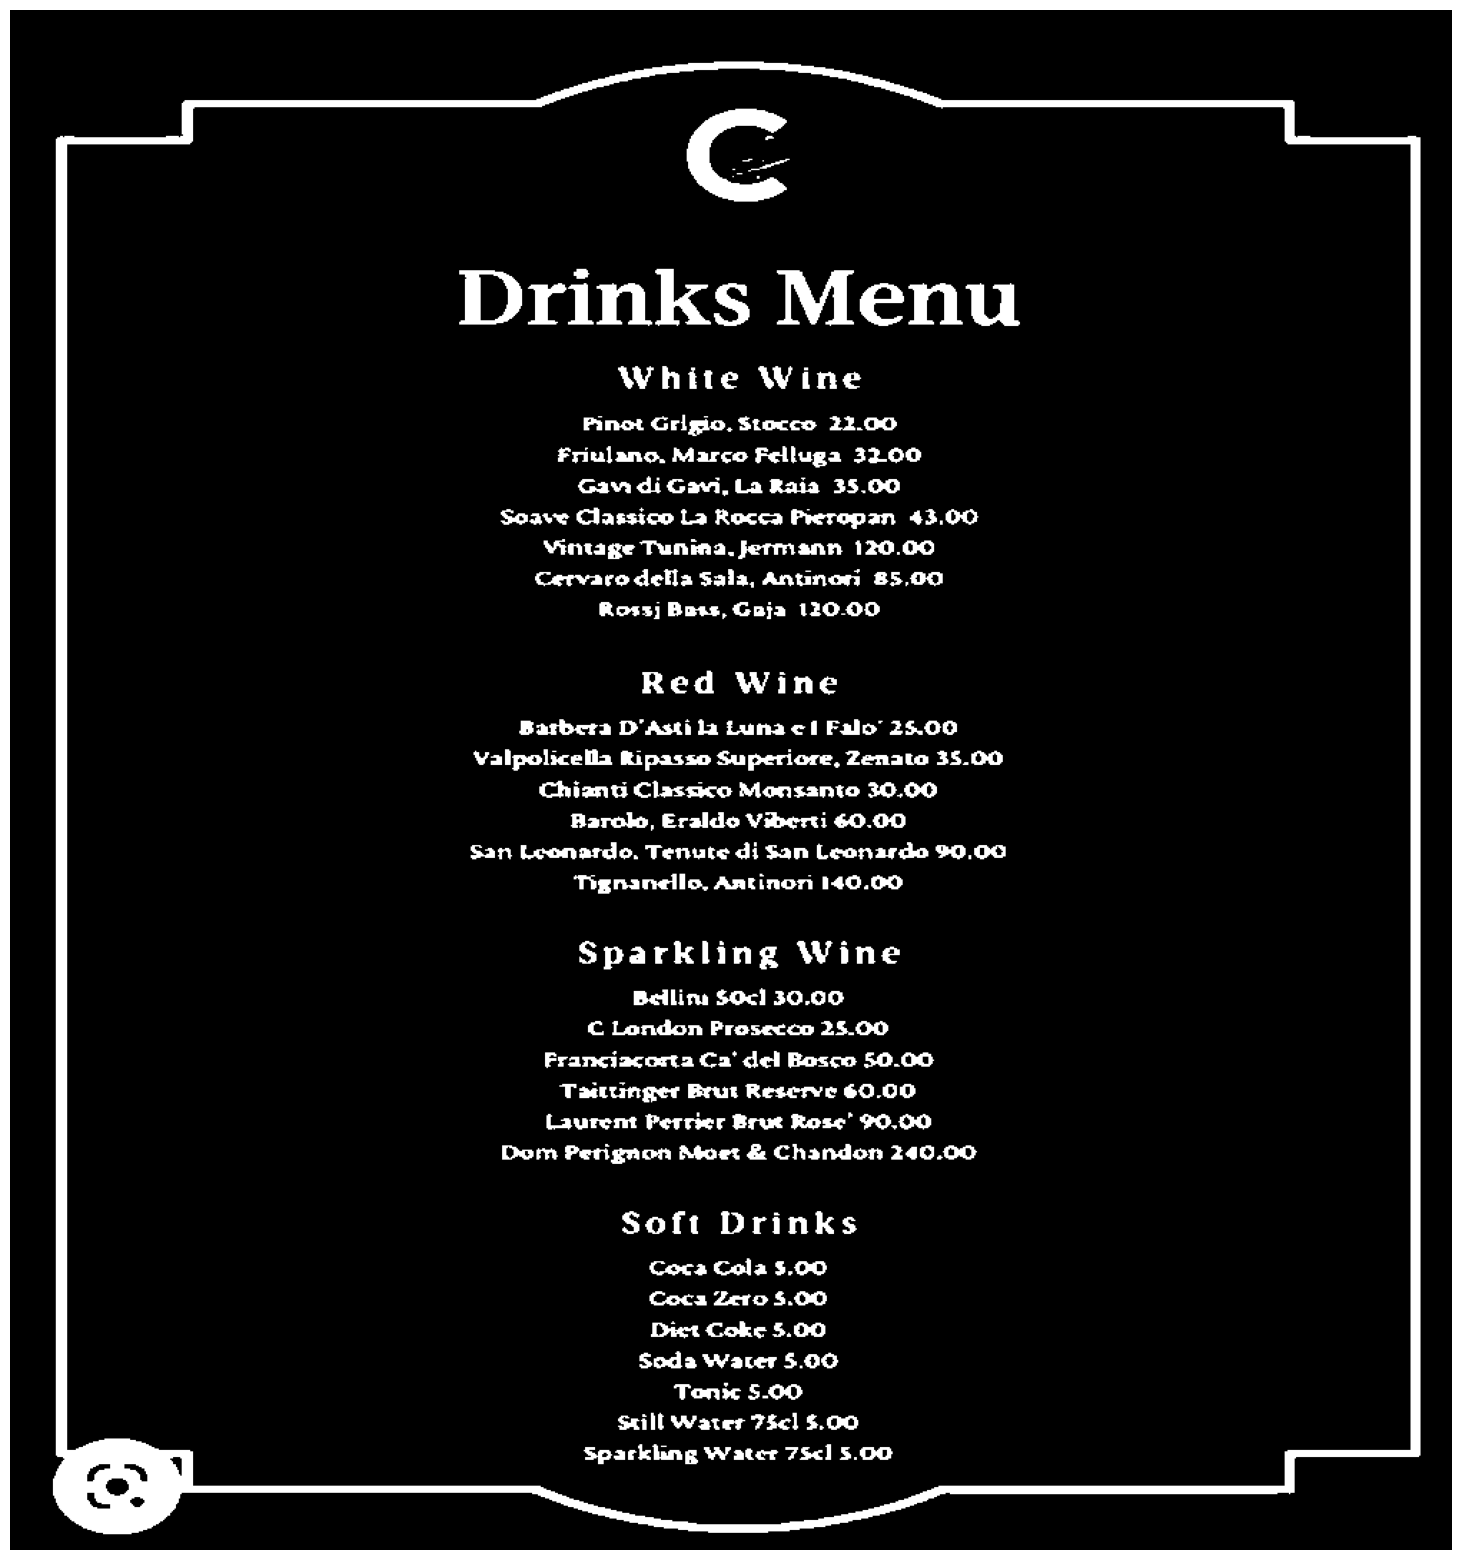

In [125]:
# Remove shadows
img = cv2.imread('../Task3_images/document/OCR_Test_Image_4.png', -1)


rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
#     norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
#     result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
# result_norm = cv2.merge(result_norm_planes)

result = cv2.fastNlMeansDenoisingColored(result, None, 10, 10, 7, 15) 

result = cv2.resize(result, None, fx=2, fy=1.5)

cv2.imwrite("no_shadow.png", result)
image = imread("no_shadow.png")
# cv2.imwrite("norm_shadow.png", result_norm)

gray_img = rgb2gray(image)
blurred_gray_img = gaussian(gray_img)

thresh = threshold_otsu(gray_img)
binary = invert(gray_img > thresh)
# blur = cv2.bilateralFilter(result,9,75,75)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(binary, cmap="gray")

text: Drinks Menu

White Wine

Pinot Grigio, Stocco 22.00
Friulano, Marco Felluga 32.00
Gani di Gavi. ta Raia 35.00
Seave Classico La Rocca Picropan 43.00
Vintage Tunina.Jermann 120.00
Cervaro dela Sala, Antinori 85.00
Roxssj Bass, Gaja 120.00

Red Wine

Barbera D'Asti la Luma ct Falo” 25.00
Valpolicella Ripasso Superiore, Zenato 35.00
Chianti Classico Monsanto 30.00
Barolo, Eraklo Viberti 60.00
San Leonardo, Tenute di San Lroonarde 90.00
‘Tignanello. Antinori 140.00

Sparkling Wine
Beilina SOc] 30.00
Cc London Prosecoo 25.00
Franciacorta Ca‘ dec! Bosco 50.00
Vastumnger Brut Rescemc 60.00
Laurent Perrier Brut Rose” 70.00
Dom Perignon Moct & Chandon 240.00

Soft Drinks

Coca Cala $.00
Coca Zero $.00
Diet Coke 5.00
Soda Water 5.00
Tonic 5.00
Saill Water 751 5.00
Sparkling Water 751 5.00

 



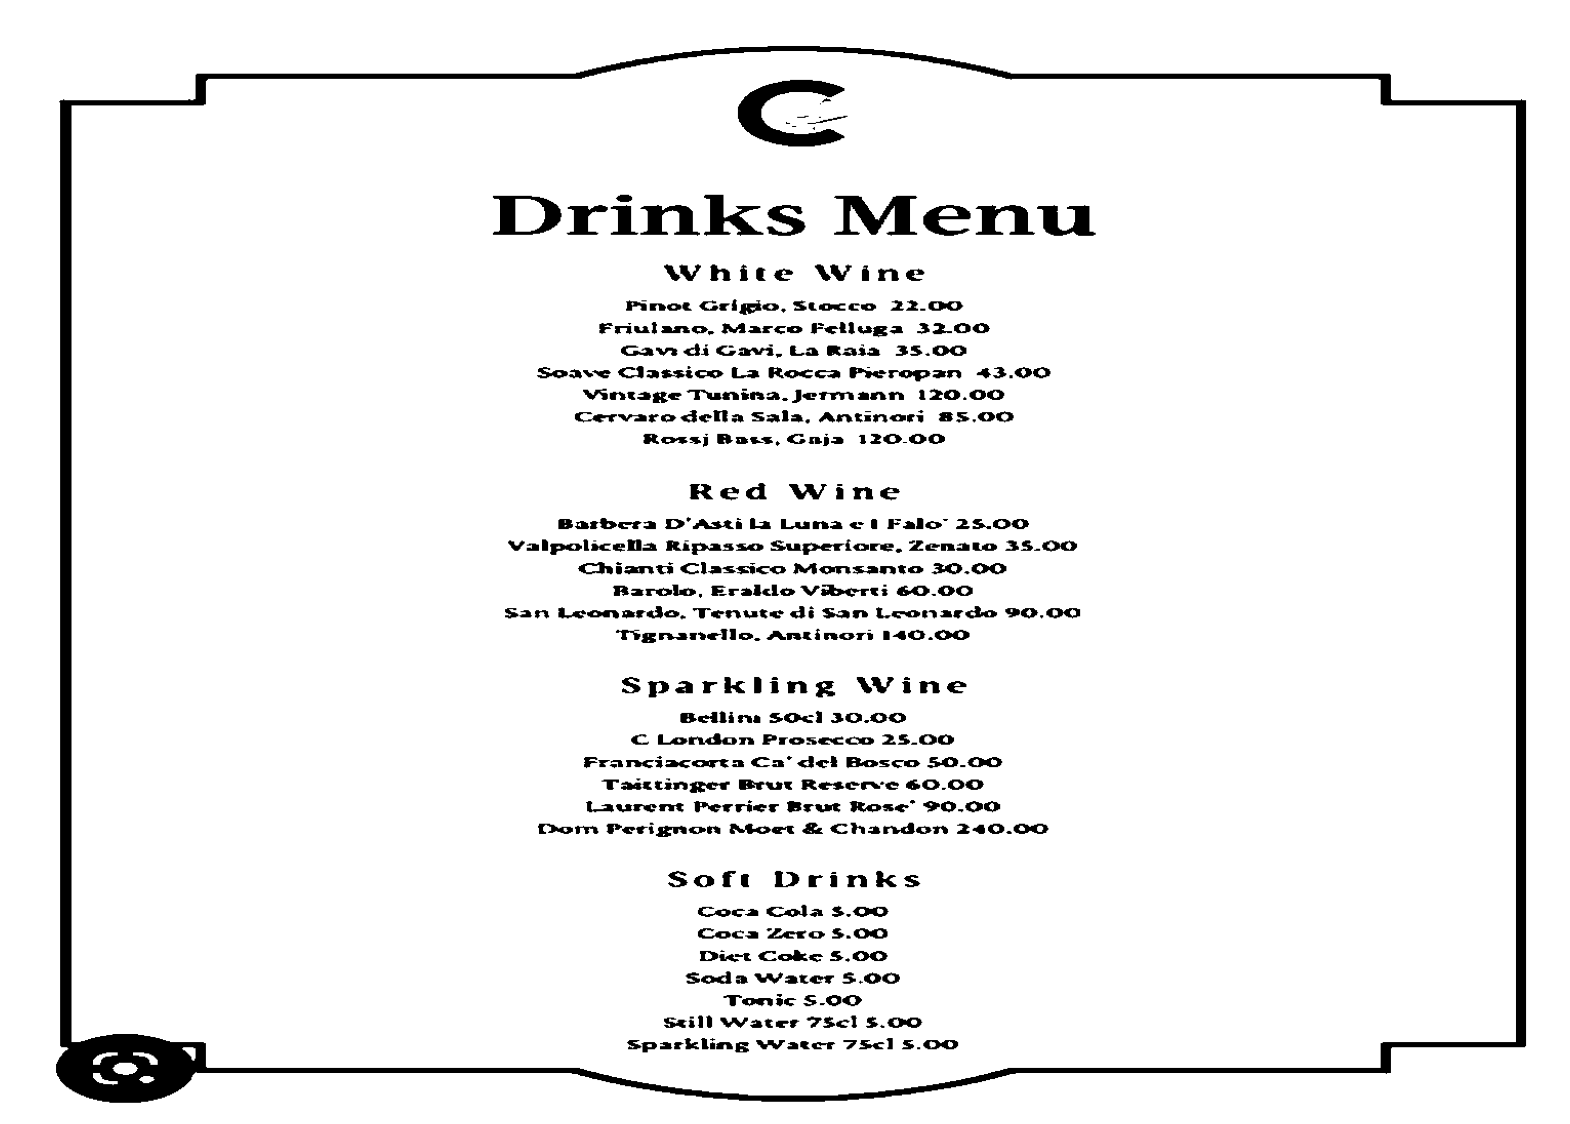

In [124]:
img = cv2.imread("binary.png")
height, width, channels = img.shape
binary = invert(gray_img < thresh)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(binary, cmap="gray")
img = cv2.resize(img, ((height*2), (width*2)))
text = pytesseract.image_to_string(binary)
print("text:", text)
plt.savefig("white.png")

In [30]:
scale = 3 # multiple to resize image
for root, dirs, file_names in os.walk(path_to_images):
  for file_name in file_names:
    print(file_name)
    img = cv2.imread(path_to_images + file_name)
    height, width, channels = img.shape
#     print(f'\nheight: {height} \nnew_height: {height*2} \nwidth: {width} \nnew_width: {width*2}')
    img = cv2.resize(img, ((height*2), (width*2)))
    text = pytesseract.image_to_string(img)
    print(text)

RE72 EKN.jpg
 

   

    

i
i Na ven
me

ig

;
\ , i
.

y
)
Py §
Le
ee) ase
eS 9g
; y
my y
tpall
hy)
ay
fei
My
i
D
4 ‘ ji
f
f pif
Mit
i
es
f Y
I
j 4)
Wi
bf ih
i
f

 

KP14 KYJ.jpg
 

JE-9200.jpeg
 

BN69 CWD.jpeg
 

F PR1144.jpeg
 

BP70 JFX.jpg
 

HY67 VBF.png
        

 

ee)
i
| iP
i

NK09 FJY.jpeg
 

BC 2128-7E.jpg
 

W 553 HX.jpeg
 

KV20 YSY.jpg
 

POIO VWW.jpeg
 

S KY 718.jpg


KeyboardInterrupt: 